In [19]:
import sqlite3 as sql
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [45]:
db = "/home/eric/Documents/franklin/fowler/data/decomposition.sqlite"
con = sql.connect(db)
con.text_factory=str

qry = '''
SELECT nhgisplace10, cbsa_geoid10, name10, pop00, pop10,
(pop10 - pop00) * 1.0 / pop00 * 100 AS pchg,
Ep
FROM subset_places_00_10
'''
places10 = pd.read_sql(qry, con, index_col='nhgisplace10')
con.close()

places10['chg_cat'] = 'growth'
places10.loc[places10['pchg']<0, 'chg_cat'] = 'loss'
places10.groupby('chg_cat').size()

places10.groupby('chg_cat').size()

chg_cat
growth    3223
loss      2183
dtype: int64

In [44]:
db = "/home/eric/Documents/franklin/fowler/data/decomposition.sqlite"
con = sql.connect(db)
con.text_factory=str

qry = '''
SELECT nhgisplace00, cbsa_geoid10, name10, pop90, pop00,
(pop00 - pop90) * 1.0 / pop90 * 100 AS pchg,
Ep
FROM subset_places_90_00
'''
places00 = pd.read_sql(qry, con, index_col='nhgisplace00')
con.close()

places00['chg_cat'] = 'growth'
places00.loc[places00['pchg']<0, 'chg_cat'] = 'loss'
places00.groupby('chg_cat').size()

places00.groupby('chg_cat').size()

chg_cat
growth    3638
loss      1681
dtype: int64

In [46]:
db = "/home/eric/Documents/franklin/fowler/data/decomposition.sqlite"
con = sql.connect(db)
con.text_factory=str

qry = '''
SELECT nhgisplace90, cbsa_geoid10, name10, pop80, pop90,
(pop90 - pop80) * 1.0 / pop80 * 100 AS pchg,
Ep
FROM subset_places_80_90
'''
places90 = pd.read_sql(qry, con, index_col='nhgisplace90')
con.close()

places90['chg_cat'] = 'growth'
places90.loc[places90['pchg']<0, 'chg_cat'] = 'loss'
places90.groupby('chg_cat').size()

places90.groupby('chg_cat').size()

chg_cat
growth    2767
loss      2507
dtype: int64

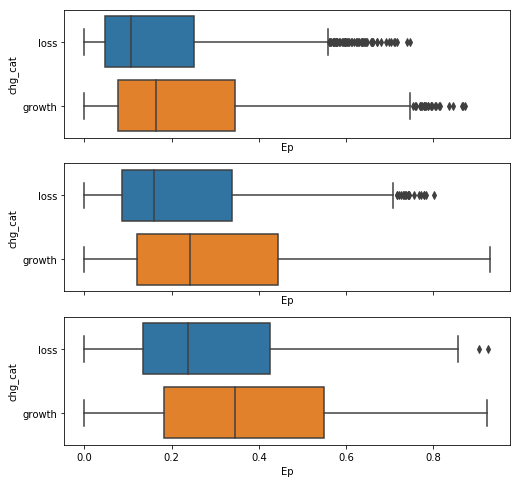

In [5]:
# plot place diversity for full sample by growth/loss
# plots descend by period
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,8))

sns.boxplot('Ep', 'chg_cat', data=places10, ax=axes[2])
sns.boxplot('Ep', 'chg_cat', data=places00, ax=axes[1])
sns.boxplot('Ep', 'chg_cat', data=places90, ax=axes[0])

## diversity profile

rather than compare places over time, compare loss and growth places for individual CBSAs as separate histograms, kernel plots

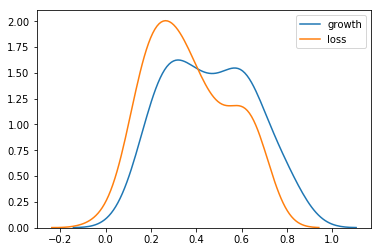

In [41]:
detroit=places10.loc[places10['cbsa_geoid10']=='37980']

sns.kdeplot(data=detroit.loc[detroit['chg_cat']=='growth']['Ep'], label='growth')
sns.kdeplot(data=detroit.loc[detroit['chg_cat']=='loss']['Ep'], label='loss')

In [131]:
from collections import OrderedDict
cbsa_dict = OrderedDict()
for k, v in places10[['cbsa_geoid10', 'name10']].sort_values('name10').iterrows():
    if v['cbsa_geoid10'] not in cbsa_dict:
        cbsa_dict[v['cbsa_geoid10']] = v['name10']

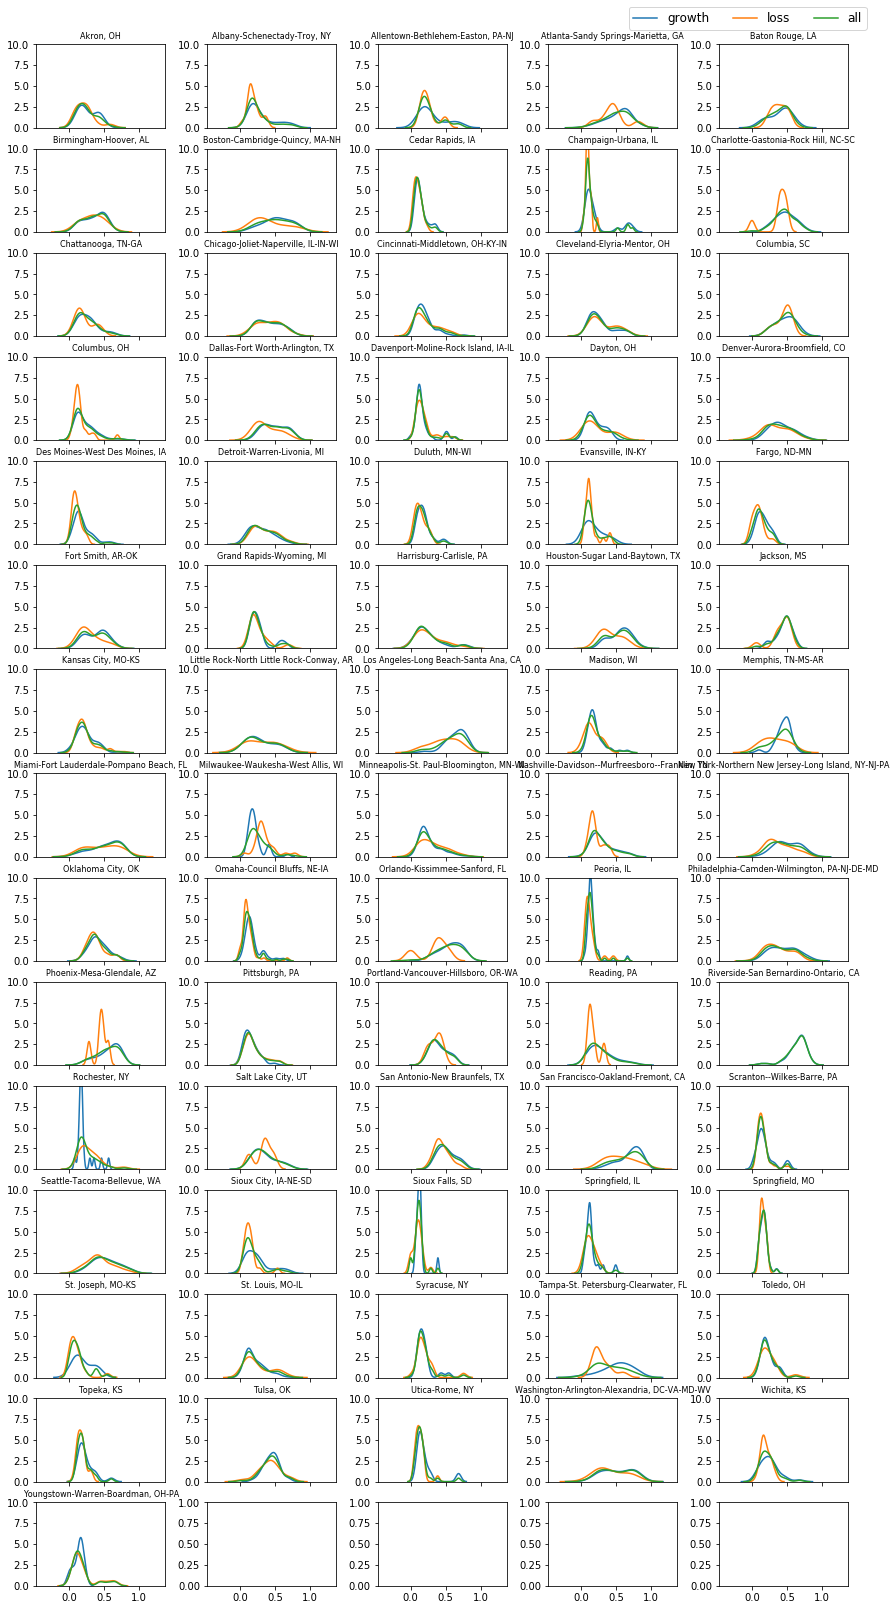

In [133]:
fig, axes = plt.subplots(nrows=15, ncols=5, sharex=True, figsize=(12,22), squeeze=False)
fig.tight_layout()
# plt.subplots_adjust(hspace = 1)
axli = axes.flatten()

count=0
for k, v in cbsa_dict.iteritems():
    if count>=71:
        pass
    else:
        temp=places10.loc[places10['cbsa_geoid10']==k]
        ax=sns.kdeplot(data=temp.loc[temp['chg_cat']=='growth']['Ep'], label='growth', ax=axli[count], legend=False)
        ax=sns.kdeplot(data=temp.loc[temp['chg_cat']=='loss']['Ep'], label='loss', ax=axli[count], legend=False)
        ax=sns.kdeplot(data=temp['Ep'], label='all', ax=axli[count], legend=False)
        ax.title.set_text(v)
        ax.title.set_size(8)
        ax.set_ylim(0,10)
    count+=1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=4, borderaxespad=0., fontsize=12, bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure, ncol=3)

# fig.suptitle('CBSA diversity profile by growth/loss 2010')

outFile = "/home/eric/Documents/franklin/fowler/diversity_profile_2010.png"
plt.savefig(outFile, dpi=600, bbox_inches='tight')